## Data Analysis and Machine Learning Course Project

### Introduction

As part of the course we were given time to practice what we had learned. We could go out and look for data, analyse it and present what we had found.

We were given links to various sources of data to start with, and one of these links was to Open Data Bristol, a repository for Bristol City Council's data. One task we were set was to analyse the spending of the coucil over the years from the *Bristol City Council expenditure over £500* dataset.

I opened the data set to review what was there, and having a background in construction was drawn to the construction projects which were there. I then reviewed other datasets which were available and noticed one about *Land and building assets*, which contained informaiton on the property name and location.

I then came up with a theory that I might be able to link these two datasets to find how much money the council had spent on construction projects and where they had spent it.

Finally I found another dataset, *Quality of Life*, which gave informaiton, by ward, about residents responses to survey questions. With this I summerised that I might be able to find out how residents felt about construction projects in their area and therefore compare this to what had been built and how much had been spent in a ward.

#### Datasets

Bristol City Council expenditure over £500 - https://opendata.bristol.gov.uk/documents/a11aed7106134c00a5587109533909d2/explore

Land and building assets - https://www.bristol.gov.uk/council-and-mayor/council-spending-and-performance/spending-over-500

Quality of Life - https://opendata.bristol.gov.uk/datasets/2dccc4c088494133ba3b9a4efaab47d9_0/explore

#### Libraries

Below are the libraries used in this code

In [242]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.image as mpimg 
from PIL import Image 
from statistics import mean
from bng_latlon import OSGB36toWGS84

### Land and property data

I first ran this code using just data from a three month period, then I expanded up to a year and finally multiple years.

There were multiple CSV files covering the years I wanted to use, therefore I thought it sensible to combine them into a single CSV file, which I did using Excel.

I imported the CSV file to assess it and clean it.

In [4]:
#Import the councils CSV file which has all their property names in it:
df_assets = pd.read_csv("CSV/land-property-2014-2023.csv")

#Found that there are NaN values in the Geo_X and Geo_Y columns, these can be removed:
df_assets = df_assets.dropna(subset="Geo X (Easting)").reset_index()
df_assets


,index,Organisation Name,Organisation Code,Effective Date,UPRN,Property ID,Property Type,Property Name,Property Name/Address (Where no UPRN),Secondary Address Detail,...,Licence In to Council,Licence Out,Sub-lease In to Council,Sub-lease Out,Vacant,Asset Type,Building Size - GIA (M2),Site Area (Hectares),Occupied by Council / Direct Service Property,Purpose / Asset Category
0,0,"Bristol, City of",http://opendatacommunities.org/id/unitary-auth...,02/02/2024,NaN,1603,Land-Car/Lorry Park,Victoria Road - Land At,Victoria Road - Land At Victoria Road St Phili...,NaN,...,NaN,NaN,NaN,NaN,NaN,Land only,NaN,0.058500,NaN,Indirect Service / Non-Investment Letting(s)
1,1,"Bristol, City of",http://opendatacommunities.org/id/unitary-auth...,02/02/2024,NaN,1475,Land-Garden,Hill Cottage - Land At,Hill Cottage - Land At Brislington Hill Brisli...,NaN,...,NaN,Licence Out,NaN,NaN,NaN,Land only,NaN,0.014800,NaN,Indirect Service / Non-Investment Letting(s)
2,2,"Bristol, City of",http://opendatacommunities.org/id/unitary-auth...,02/02/2024,NaN,1476,Land-Verge,Stapleton Road - Land To The SW Of Railway Bridge,Stapleton Road - Land To The SW Of Railway Bri...,NaN,...,NaN,NaN,NaN,NaN,NaN,Land only,NaN,0.675358,NaN,Infrastructure
3,3,"Bristol, City of",http://opendatacommunities.org/id/unitary-auth...,02/02/2024,NaN,1483,Industrial/Workshop,Cumberland Basin - Workshop Units Beneath Plim...,Cumberland Basin - Workshop Units Beneath Plim...,NaN,...,NaN,NaN,NaN,NaN,NaN,Land and Building(s),0.0,0.493444,NaN,Investment Properties
4,4,"Bristol, City of",http://opendatacommunities.org/id/unitary-auth...,02/02/2024,NaN,1490,Land-Verge,Dalkeith Avenue/Ingleside Road - Land At Jnctn Of,Dalkeith Avenue/Ingleside Road - Land At Jnctn...,NaN,...,NaN,NaN,NaN,NaN,NaN,Land only,NaN,0.014700,NaN,Infrastructure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,5203,"Bristol, City of",http://opendatacommunities.org/id/unitary-auth...,07/01/2022,NaN,139540,Access/Right Of Way,Gorse Hill - Access Lane Between 95-97,Gorse Hill - Access Lane Between 95-97 Speedwe...,NaN,...,NaN,NaN,NaN,NaN,NaN,Land only,NaN,0.010177,NaN,Infrastructure
5202,5204,"Bristol, City of",http://opendatacommunities.org/id/unitary-auth...,07/01/2022,324895.0,6363,Public Conveniences,Southmead Former Public Conveniences,Southmead Former Public Conveniences Greystoke...,NaN,...,NaN,NaN,NaN,NaN,Vacant,Land and Building(s),11.0,0.001311,NaN,Surplus / Non-operational / Under Review
5203,5205,"Bristol, City of",http://opendatacommunities.org/id/unitary-auth...,07/01/2022,NaN,139519,Land-Unused Land,Wellington Hill West - Land At Rear Of 78,Wellington Hill West - Land At Rear Of 78 Hen...,NaN,...,NaN,NaN,NaN,NaN,NaN,Land only,NaN,0.002910,NaN,Surplus / Non-operational / Under Review
5204,5206,"Bristol, City of",http://opendatacommunities.org/id/unitary-auth...,07/01/2022,NaN,139356,Energy Generation Installation,Castle Park View - District Heating Supply Sub...,Castle Park View - District Heating Supply Sub...,NaN,...,NaN,NaN,NaN,NaN,NaN,Structure,NaN,0.002328,Yes,Direct Service


I wanted to create a list of words which related to the names of properties, so I could search for these words in the expenditure dataset, therefore being able to link the expenditure data with a property.

The first time I did this I took all the words in the *Property Name* column. However this had lots of extra words such as *- land at* which were  not helpful. So I have added in removeing everything after the - and /, by splitting at those characters and selecting the first string. The I needed to remove blank spaces from the ends of the words.

I then found that I needed to break the list up into individual words, as the property names did not match those in the expenditure dataset, they would only have a few words from the property name.

I found there were some words which would also be good to remove as they were not helping to find the location, therefore I created a list of these words and a function to remove them from the list.

Finally I sorted the list by the length of the words, as using a findall function later, worked better if it looked for longer words first, rather than shorter words.

In [5]:
#Create a sting from the Property Name column 
s_names = df_assets["Property Name"].str.split("-").str[0].str.split("/").str[0].str.rstrip()

#Turn it into a dictionary and then a dataframe
d_names = {"Location Name":s_names}
df_names = pd.DataFrame(d_names)

#Need to split the values into two columns so that we get all individual words.
s_y = df_names["Location Name"].str.split().str[0].to_string(index = False).split()
s_z = df_names["Location Name"].str.split().str[1].to_string(index = False).split()

#Create a data frame from the string
df_y = pd.DataFrame({"Location names":s_y})
df_z = pd.DataFrame({"Location names":s_z})

#Combine the dataframes and remove duplicates in the dataframe
df_a = pd.concat([df_y,df_z],ignore_index=True).drop_duplicates()

#Turn it back into a list
l_ln = df_a["Location names"].tolist()

#Create a list of words to remove
remove = ["Capital","A","C","M","R","B","E","L","O","U","V","W","X"," ","Ex","Junior","New","Bed","land","Old","Site",
          "Development","Works","The","Air","Lime","Bus","Lower","Lodge","Du","Second","Fields","Early","Of","High","Pen","9",
          "Public","Early","Gate","Rugby","Cinema","Housing","2","3","4","5","6","7","8","BMX","Skate","&","In","Home","I",
          "Contract","Techno","Neighbourhood","Car","Rec","Part","Block","Signel","Service","1","Land","Shed","St","Area","La",
          "On","Primary","Road"]

#Define a function to remove these words from any point in the list
def remove_all(list_obj,values):
    for value in values:
        while value in list_obj:
            list_obj.remove(value)

#Apply the function to the list
remove_all(l_ln,remove)

#Add in some words which are helpful
l_ln.append("Werburgh")

#Sort the list by length of word
l_ln = sorted(l_ln, key=lambda x: len(x))
l_ln.reverse()
l_ln

['Gloucestershire',
 'International',
 'Redevelopment',
 'Knightsbridge',
 'Environmental',
 'Distribution',
 'Conveniences',
 'Installation',
 'Conservation',
 'Amphitheatre',
 'Architecture',
 'Bonaventures',
 'Metropolitan',
 'Bartholomews',
 'Lamplighters',
 'Hillsborough',
 'Wharnecliffe',
 'Beaconsfield',
 'Gainsborough',
 'Newfoundland',
 'Bishopthorpe',
 'Shirehampton',
 'Bishopsworth',
 'Orthopaedic',
 'Whiteladies',
 'Supermarket',
 'Servicemens',
 'Crematorium',
 'Stonemasons',
 'Residential',
 'Bernadettes',
 'Marchioness',
 'Restaurant,',
 'Underground',
 'Knightstone',
 'Wallingford',
 'Beggarswell',
 'Butterfield',
 'Throgmorton',
 'Trendlewood',
 'Chattertons',
 'Pentecostal',
 'Ridingleaze',
 'Footbridges',
 'Springfield',
 'Dangerfield',
 'Pigeonhouse',
 'Thornycroft',
 'Marlborough',
 'Environment',
 'Canningford',
 'Sandburrows',
 'Nightingale',
 'Meadowsweet',
 'Chessington',
 'Dockmasters',
 'Littlecross',
 'Winterstoke',
 'Heatherdene',
 'Thurlestone',
 'Blackswa

### Expenditure data

I then imported the council's expenditure dataset.

In [6]:
#Import the councils payments over £500 CSV file
df_spend = pd.read_csv("CSV/Spend_over_500 2014-2023.csv",encoding='unicode_escape')
df_spend.head()

/var/folders/ml/s2r5g8_x31l75sq2ql0l0qww0000gn/T/ipykernel_75764/1168619313.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_spend = pd.read_csv("CSV/Spend_over_500 2014-2023.csv",encoding='unicode_escape')


,Date_of_Payment,Payee,Amount,Description_1,Description_2,Description_3,Transaction_ID,ObjectId
0,01/09/2013,Bath North East Somerset Council,137111,Enhanced Pension,Unfunded Pensions,NaN,NaN,93.0
1,01/09/2013,Hibu UK Ltd,1020,Marketing Nonstaff advertising,Adoption Grant 1314,NaN,NaN,156.0
2,01/09/2013,Glens TakeAway Catering,525,Catering,Equalities Social Inclusion Bome,NaN,NaN,260.0
3,01/09/2013,We Care Repair Limited,4454,TPP Home Care,Injury Prevention,NaN,NaN,411.0
4,01/09/2013,MultiAlarm Systems GB Ltd,707,RM Building Practice response,Day Centre Bristol 600,NaN,NaN,502.0


In [64]:
#Extract the columns I want to keep into a new dataframe
df_1 = df_spend[["Description_1","Description_2","Description_3","Amount","Payee","Date_of_Payment"]]
df_1 = df_1.rename(columns={"Description_1":"Description 1","Description_2":"Description 2","Description_3":"Description 3",
                     "Payee":"Name","Date_of_Payment":"Pay Date"})
df_1

,Description 1,Description 2,Description 3,Amount,Name,Pay Date
0,Enhanced Pension,Unfunded Pensions,NaN,137111,Bath North East Somerset Council,01/09/2013
1,Marketing Nonstaff advertising,Adoption Grant 1314,NaN,1020,Hibu UK Ltd,01/09/2013
2,Catering,Equalities Social Inclusion Bome,NaN,525,Glens TakeAway Catering,01/09/2013
3,TPP Home Care,Injury Prevention,NaN,4454,We Care Repair Limited,01/09/2013
4,RM Building Practice response,Day Centre Bristol 600,NaN,707,MultiAlarm Systems GB Ltd,01/09/2013
...,...,...,...,...,...,...
619608,TPP - Placement Residential,Out Of Authority - Placements,,"42,372.00",JN Healthcare,18/08/2022
619609,TPP - Placement NonLAC,RO & SGO,,"1,921.91",REDACTED,25/08/2022
619610,Computing - Licences,Applications Support,,"1,113.06",Pix Software GmbH,25/08/2022
619611,Services - Fees and Charges,Learning City,,415,NoNIIN Pty Ltd,25/08/2022


The dataframe still has lots of rows which are not applicable to my dataset and I used a CSV file and Excel to reduce the Descritpion 1 down to 125 rows, from which to work out which aspects of description 1 I wanted to use.

In [82]:
#Create a list of Descritipions which I will want to use.
l_descrip = ["Acquisition of Buildings", "Conversion, Renovation & Improvement","New Construction"]

#Keep only those rows in the dataframe
df_1 = df_1[df_1["Description 1"].isin(l_descrip)]

#Turn pay date into a date and sort the values by it
df_1["Pay Date"] = pd.to_datetime(df_1["Pay Date"],dayfirst=True)
df_1 = df_1.sort_values("Pay Date")

#Eventually I found out that one value in Description 2 had a NaN value, which meant I could not join extracted values later
#as it was returning nothing, not a list. So I had to drop this value from the dataset.
df_1 = df_1.dropna(subset=["Description 2"])

df_1

,Description 1,Description 2,Description 3,Amount,Name,Pay Date
1167,"Conversion, Renovation & Improvement",St Werburgh's Primary School Phase I II,St Werburghs Primary Phase 1 Woodward Centre,1077,McKeown Business Moves Ltd,2013-09-01
1492,New Construction,Filton Orchard additional places of which 80...,Filton Orchard additional places of which 80...,397707,Bristol Schools Limited,2013-09-01
1493,"Conversion, Renovation & Improvement",BWP 100 Temple Street,BWP 100 Temple Street Security,34963,BWS Security Systems Ltd,2013-09-01
1495,New Construction,Library Feasibility,Library Feasibility,672,J Hughes Associates Limited,2013-09-01
1574,"Conversion, Renovation & Improvement",Neighbourhood Investment Projects,Neighbourhood Investment Board,3253,Domestic Drain Services,2013-09-01
...,...,...,...,...,...,...
577307,"Conversion, Renovation & Improvement",Capital - Planned Programme,External Major Repairs to Blocks,"198,514.55",Bell Decorating Group Ltd,2023-12-29
578439,New Construction,Capital - Harbour and New Cut Asset Inspection...,Harbour and New Cut Asset Inspection Commission,"1,753.80",Carlisle Staffing PLC T/A Guidant Global,2023-12-29
581703,New Construction,Capital - Carriageway Reconstruction/Resurfacing,Additional Pothole Action Fund 20/21 & 21/22,484.58,Resolution Signs Ltd,2023-12-29
580396,"Conversion, Renovation & Improvement",Capital - Planned Programme,Planned Programme  Kitchen Contract,"6,858.11",Jeff Way Construction Ltd,2023-12-29


### A bit of analysis

As I now had this data I thought it migth be interesting to chart their spending over time across the three broad groups of Acquisition of Buildings, Conversion, Renovation & Improvement and New Construction.

I put these into a new dataframe, changing the types of data into a datetime and  numerical as appropriate. Then extracting the month and year from the data and turning it into a string. This way I could group the spending by month and year.

Plot line and area charts to see the results.

In [83]:
#Make a dataframe to get the descritption, pay date and amount, so that we can turn this into a chart.
#Convert the pay date into a date
dff = pd.DataFrame()
dff["Description 1"] = df_1["Description 1"]
dff["Pay Date"] = pd.to_datetime(df_1["Pay Date"],dayfirst=True)
dff["Amount"] = df_1["Amount"].replace(',','', regex=True).astype(float)

#Extract the month and year from pay date and turn it into a string.
dff["month_year"] = dff["Pay Date"].dt.to_period("M").astype(str)

#Group by the description and the month_year and sum up the amounts.
dff = dff.groupby(["Description 1","month_year"],as_index=False).Amount.sum()
dff = dff.sort_values("month_year")

#Create a line chart showing how the total amount payed per month changes over time.
fig = px.line(dff,x="month_year",y="Amount",color = "Description 1")
fig.update_layout(hovermode="x unified")
fig.show()
#Create an area chart showing how the total amount payed per month changes over time.
fig = px.area(dff,x="month_year",y="Amount",color = "Description 1")
fig.update_layout(hovermode="x unified")
fig.show()
dff

,Description 1,month_year,Amount
201,New Construction,2013-09,1194025.00
79,"Conversion, Renovation & Improvement",2013-09,347208.00
202,New Construction,2013-10,935007.00
80,"Conversion, Renovation & Improvement",2013-10,402843.00
203,New Construction,2013-11,445355.00
...,...,...,...
77,Acquisition of Buildings,2023-11,244046.82
320,New Construction,2023-11,4135425.64
78,Acquisition of Buildings,2023-12,41698.18
200,"Conversion, Renovation & Improvement",2023-12,7736702.62


What was the big peak in Acquisition of Buildings in Jan 2019?

The purchase of Hawkfield Business Park

In [169]:
#Return the rows where the description is equal to Acquisition of Buildings and the Pay Date was in January 2019
df_1.loc[((df_1["Description 1"] == "Acquisition of Buildings") & (df_1["Pay Date"] >= "2019-01-01") & (df_1["Pay Date"] < "2019-02-01"))]

,Description 1,Description 2,Description 3,Amount,Name,Pay Date
303034,Acquisition of Buildings,Capital Generic Capital Funding,Hawkfield Business Park,5250000,Gregg Latchams Solicitors,2019-01-02
305470,Acquisition of Buildings,Capital Generic Capital Funding,Hawkfield Business Park,304500,HMRC,2019-01-16


From the charts above I noted that my dates were not aligning across the dataframes because some dates did not have any payments made in certain descriptions. Therefore I needed to redo these, however thought it would also be more intersting to see the 6 month rolling mean across this period too.

So I created new dataframes which would have all the months in over the peroid of the data, and then put the spend data into the right rows in these dataframes. I was then able to find the rolling average across these results and plot line and area graphs of this.

In [172]:
#Find the start and end dates of the data in df_1
begin_date = df_1.iloc[0]["Pay Date"]
end_date = df_1.iloc[df_1.shape[0]-1]["Pay Date"]

#Create the New Construction dataframe with a row entry for each month
dff_NC = pd.DataFrame({"Description 1":"New Construction",'Pay Date':pd.date_range(begin_date, end_date)})

#Extract the month and year from pay date and turn it into a string.
dff_NC["month_year"] = dff_NC["Pay Date"].dt.to_period("M").astype(str)
dff_NC = dff_NC.drop(columns="Pay Date").drop_duplicates()

#Create an amount list
Amount = []

#Go through the dff dataframe to find the relevant summed amount and allocate it to each month, if nothing was spend show 0
#Put this into a list
for i in range(dff_NC.shape[0]):
    a = dff_NC.iloc[i]["month_year"]
    b = dff_NC.iloc[i]["Description 1"]
    c = dff.loc[((dff["Description 1"] == b) & (dff["month_year"] == a)),"Amount"]
    if c.size > 0:
        Amount.append(c.iloc[0])
    else:   
        Amount.append(0)

#Add the list to the NC dataframe
dff_NC["Amount"] = Amount

#Calculate the rolling average from this column
dff_NC["Rolling mean"]= dff_NC['Amount'].rolling(6,center=True).mean()

#Create the Conversion, Renovation & Improvement dataframe and follow the process above (Should have made a funtion)
dff_CRI = pd.DataFrame({"Description 1":"Conversion, Renovation & Improvement",'Pay Date':pd.date_range(begin_date, end_date)})

dff_CRI["month_year"] = dff_CRI["Pay Date"].dt.to_period("M").astype(str)
dff_CRI = dff_CRI.drop(columns="Pay Date").drop_duplicates()

Amount = []

for i in range(dff_CRI.shape[0]):
    a = dff_CRI.iloc[i]["month_year"]
    b = dff_CRI.iloc[i]["Description 1"]
    c = dff.loc[((dff["Description 1"] == b) & (dff["month_year"] == a)),"Amount"]
    if c.size > 0:
        Amount.append(c.iloc[0])
    else:   
        Amount.append(0)

dff_CRI["Amount"] = Amount

dff_CRI["Rolling mean"]= dff_CRI['Amount'].rolling(6,center=True).mean()

#Create the Acquisition of Buildings dataframe and follow the process above
dff_AB = pd.DataFrame({"Description 1":"Acquisition of Buildings",'Pay Date':pd.date_range(begin_date, end_date)})

dff_AB["month_year"] = dff_AB["Pay Date"].dt.to_period("M").astype(str)
dff_AB = dff_AB.drop(columns="Pay Date").drop_duplicates()

Amount = []

for i in range(dff_AB.shape[0]):
    a = dff_AB.iloc[i]["month_year"]
    b = dff_AB.iloc[i]["Description 1"]
    c = dff.loc[((dff["Description 1"] == b) & (dff["month_year"] == a)),"Amount"]
    if c.size > 0:
        Amount.append(c.iloc[0])
    else:   
        Amount.append(0)

dff_AB["Amount"] = Amount

dff_AB["Rolling mean"]= dff_AB['Amount'].rolling(6,center=True).mean()

#Combine them all into one dataframe and sort the values by month and year
dff_rm = pd.concat([dff_NC,dff_CRI,dff_AB])
dff_rm = dff_rm.sort_values("month_year")

#Create a line chart showing how the total amount payed per month changes over time.
fig = px.line(dff_rm,x="month_year",y="Rolling mean",color = "Description 1")
fig.update_layout(hovermode="x unified")
fig.show()

#Create an area chart showing how the total amount payed per month changes over time.
fig = px.area(dff_rm,x="month_year",y="Rolling mean",color = "Description 1")
fig.update_layout(hovermode="x unified")
fig.show()

The graphs show that from 2014 to 2017 the monthly spending on construction was fairly high, between £7M and £11M, and increasing towards the end of the period.

However from 2017 to 2020 monthly spending dropped to be between £5M and £7M.

From 2020 it increased dramatically back to levels between £7M and £11M.

### Back to the project

Using the earlier list of location names from the assets dataframe, I used a findall function to find where any of these words appeared in the Description 2 column of my construction spending dataframe, and added these words to a series, and then into a new dataframe. This gave me a list of words for each constriuction spending row, which should relate to a Property Name in the assets dataframe.

I then went through the assets dataframe finding any row which had the words in them and extracting the easting and northings (Geo X and Geo Y) values for that property. As names could appear more than once in the assets dataframe we would end up with multiple locations.

As there could be multiple locations for a property I used a loop function to go through the easting and northings, and if they were within a range of 500m the dataframe would use the mean of those values. If not a 0 value would be returned. 

In [10]:
#Turn the list of location names into a string using join.
s_ln = "|".join(l_ln)

#After checking through the results found that some brackets were upsetting the resulting code when ising findall. So removed them.
s_ln = s_ln.replace("(","").replace(")","")

#Where any word from the list appears in the Description 2 column of our dataframe, add that word to a series
s_locations = df_1["Description 2"].str.findall(s_ln).apply(' '.join)

#Where we didn't find any values we don't want these rows anymore, therefore turn it into a dataframe to drop them.
df_location = pd.DataFrame({"Location":s_locations})
rows_to_drop = df_location[df_location["Location"]==''].index
df_location.drop(rows_to_drop, inplace=True)

#Reset the index so I can use it in a for loop
df_location = df_location.reset_index()

#Create lists for geo location to be fille into
Geo_x = []
Geo_y = []

#I want to search for where my location appears in the assets dataframe.
#Use a loop function increaseing i by the number of rows in df_location.
#To search for rows where all words appear, but might not be next to each other use a function to add the words into the right format
#Get the row index of where the word appears
#Use the row index to find the Geo X and Geo Y locations and add these to the lists created by appending them
for i in range(df_location.shape[0]):
    base = r'^{}'
    expr = '(?=.*{})'
    words = df_location.iloc[i]["Location"].split()
    work = base.format(''.join(expr.format(w) for w in words))
    row_index = df_assets.index[df_assets["Property Name"].str.contains(work,case=False)].to_list()
    x = df_assets.iloc[row_index]["Geo X (Easting)"].to_list()
    Geo_x.append(x)
    y = df_assets.iloc[row_index]["Geo Y (Northing)"].to_list()
    Geo_y.append(y)

#Add the results to our dataframe as new columns
df_location["Geo_X"] = Geo_x
df_location["Geo_Y"] = Geo_y

#Where multiple rows were found having the values, multiple results were found.
#We want only one, therefore if they are close we could use them.
#Create lists for easting and northings
easting = []
northing = []

#Create a loop function based on the length of the dataframe.
#Initially the first two if functions were not included, but this meant I was missing any rows which had no data in them. This meant
#these rows were not appended and therefore my final list was too short and would not get appended.
#Then find the max and min values, and if these are less than 500 apart use the mean of all the values.
#If the difference equals nothing then use the value as there will only be one value or 0.
#Otherwise (for values more than 500 apart) replace with 0.
#These values are appended to the easting and northings lists as we go along.
for i in range(df_location.shape[0]):
    if len(df_location.iloc[i]["Geo_X"]) == 0:
        df_location["Geo_X"][i].append(0)
    if len(df_location.iloc[i]["Geo_Y"]) == 0:
        df_location["Geo_Y"][i].append(0)
    max_x = max(df_location.iloc[i]["Geo_X"])
    min_x = min(df_location.iloc[i]["Geo_X"])
    if max_x - min_x < 500:
        easting.append(mean(df_location.iloc[i]["Geo_X"]))
    elif max_x - min_x == 0:
        easting.append(df_location.iloc[i]["Geo_X"])
    else: 
        easting.append(0)
    max_y = max(df_location.iloc[i]["Geo_Y"])
    min_y = min(df_location.iloc[i]["Geo_Y"])
    if max_y - min_y < 500:
        northing.append(mean(df_location.iloc[i]["Geo_Y"]))
    elif max_y - min_y == 0:
        northing.append(df_location.iloc[i]["Geo_Y"])
    else: 
        northing.append(0)

#Add these lists to our dataframe
df_location["Easting"] = easting
df_location["Northing"] = northing

df_location

,index,Location,Geo_X,Geo_Y,Easting,Northing
0,82,Annexe Redland Police Station,[0],[0],0.00,0.000000
1,322,Werburgh School,"[360353.0, 360337.0, 360237.0, 360353.0, 36033...","[174781.0, 174834.0, 174713.0, 174781.0, 17483...",360313.00,174784.285714
2,396,Werburgh School,"[360353.0, 360337.0, 360237.0, 360353.0, 36033...","[174781.0, 174834.0, 174713.0, 174781.0, 17483...",360313.00,174784.285714
3,435,Begbrook,"[362767.0, 362829.0, 362782.0, 363167.0, 36316...","[176671.0, 176617.0, 176972.0, 177078.0, 17707...",362915.75,176864.833333
4,447,Bonaventures,"[358548.0, 358548.0]","[175671.0, 175671.0]",358548.00,175671.000000
...,...,...,...,...,...,...
10162,618975,Lockleaze Glencoyne,[0],[0],0.00,0.000000
10163,619083,Park 10 20 21,[0],[0],0.00,0.000000
10164,619535,Bedminster Green,[0],[0],0.00,0.000000
10165,619553,Park 10 19 20,[0],[0],0.00,0.000000


In [11]:
#Include only values where we have a location:
df_results = df_location[df_location.Easting != 0]
df_results = df_results[df_results.Northing != 0]

df_results

,index,Location,Geo_X,Geo_Y,Easting,Northing
1,322,Werburgh School,"[360353.0, 360337.0, 360237.0, 360353.0, 36033...","[174781.0, 174834.0, 174713.0, 174781.0, 17483...",360313.000000,174784.285714
2,396,Werburgh School,"[360353.0, 360337.0, 360237.0, 360353.0, 36033...","[174781.0, 174834.0, 174713.0, 174781.0, 17483...",360313.000000,174784.285714
3,435,Begbrook,"[362767.0, 362829.0, 362782.0, 363167.0, 36316...","[176671.0, 176617.0, 176972.0, 177078.0, 17707...",362915.750000,176864.833333
4,447,Bonaventures,"[358548.0, 358548.0]","[175671.0, 175671.0]",358548.000000,175671.000000
6,732,Werburgh School,"[360353.0, 360337.0, 360237.0, 360353.0, 36033...","[174781.0, 174834.0, 174713.0, 174781.0, 17483...",360313.000000,174784.285714
...,...,...,...,...,...,...
10134,617911,Cattle Market,"[359914.0, 359684.0, 359889.0, 359902.0]","[172431.0, 172269.0, 172293.0, 172427.0]",359847.250000,172355.000000
10135,617912,Cattle Market,"[359914.0, 359684.0, 359889.0, 359902.0]","[172431.0, 172269.0, 172293.0, 172427.0]",359847.250000,172355.000000
10136,617913,Cattle Market,"[359914.0, 359684.0, 359889.0, 359902.0]","[172431.0, 172269.0, 172293.0, 172427.0]",359847.250000,172355.000000
10145,618637,Filwood Broadway,"[359408.0, 359367.0, 359363.0, 359342.0, 35934...","[169651.0, 169750.0, 169537.0, 169706.0, 16969...",359360.941176,169682.294118


I then needed to add these easting and northings back into my construction spending dataframe, so that each spend had a location. The index had been maintained so I was able to use this to link the rows in the constuction spending dataframe to the location dataframe.

As not much software uses easting and northings, I found a library to use which could turn eastings and northings into latitudes and longitudes. 

In [196]:
#Create new columns in df_1 for the location
df_1["Easting"] = ""
df_1["Northing"] = ""

#Go through the results dataframe, taking the reference index to find the row to insert the easting and northing into.
for i in range(df_results.shape[0]):
    rowIndex = df_results.iloc[i]["index"]
    df_1.loc[rowIndex,"Easting"] = df_results.iloc[i]["Easting"]
    df_1.loc[rowIndex,"Northing"] = df_results.iloc[i]["Northing"]

#Remove any row with no location
df_wloc = df_1[df_1.Easting != ""].reset_index(drop=True)

#We need the values as latitude and longitude to map them, so used a package set up for this.
#Create the new columns
df_wloc["Latitude"] = ""
df_wloc["Longitude"] = ""

#Inset the values in the dataframe.
for i in range(df_wloc.shape[0]):
    df_wloc.at[i,"Latitude"] = OSGB36toWGS84(df_wloc.iloc[i]["Easting"],df_wloc.iloc[i]["Northing"])[0]
    df_wloc.at[i,"Longitude"] = OSGB36toWGS84(df_wloc.iloc[i]["Easting"],df_wloc.iloc[i]["Northing"])[1]

df_wloc = df_wloc.replace("Capital - Bristol Beacon","Capital  Bristol Beacon")
df_wloc = df_wloc.replace("Capital  Colston Hall","Capital  Bristol Beacon")
df_wloc = df_wloc.replace("Colston Hall Phase 2","Capital  Bristol Beacon")

df_wloc


/var/folders/ml/s2r5g8_x31l75sq2ql0l0qww0000gn/T/ipykernel_75764/2492450208.py:24: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Description 1,Description 2,Description 3,Amount,Name,Pay Date,Easting,Northing,Latitude,Longitude
0,"Conversion, Renovation & Improvement",St Werburgh's Primary School Phase I II,St Werburghs Primary Phase 1 Woodward Centre,1077,McKeown Business Moves Ltd,2013-09-01,360313.000000,174784.285714,51.470623,-2.572763
1,"Conversion, Renovation & Improvement",BWP 100 Temple Street,BWP 100 Temple Street Security,34963,BWS Security Systems Ltd,2013-09-01,359331.000000,172449.000000,51.449556,-2.586631
2,New Construction,St Bonaventures Primary Phased rebuild,St Bonaventures Primary Phased rebuild,81184,Clifton Diocese,2013-09-01,358548.000000,175671.000000,51.478468,-2.598276
3,New Construction,May Park Primary,May Park Primary,735,McKeown Business Moves Ltd,2013-09-01,361367.500000,174926.500000,51.471975,-2.557598
4,New Construction,Glenfrome Primary Expansion to 2 FE,Glenfrome Primary Expansion to 2 FE,4161,Bevan Brittan Llp,2013-09-01,360932.000000,175638.500000,51.478346,-2.563946
...,...,...,...,...,...,...,...,...,...,...
1670,"Conversion, Renovation & Improvement",Capital - Filwood Broadway,Filwood Framework - Active Communities (MUGA),460,Green Mantle (Ecosophy) Ltd,2023-12-07,359360.941176,169682.294118,51.424683,-2.585881
1671,"Conversion, Renovation & Improvement",Capital - The Bottle Yard - Studios Roof Repai...,The Bottle Yard - Studios Roof Repairs & Insul...,"24,739.28",OCU Northavon Group Limited,2023-12-15,359636.000000,168111.500000,51.410579,-2.581746
1672,"Conversion, Renovation & Improvement",Capital Bristol Beacon,Bristol Beacon Phase 4 - Construction,"2,907,541.07",Willmott Dixon Construction Limited,2023-12-22,358527.000000,173039.000000,51.454803,-2.598269
1673,New Construction,Capital - Temple Island,Temple Island,"143,740.79",Colas Ltd,2023-12-22,359899.000000,172132.000000,51.446747,-2.578421


I now have a dataframe with the information I wanted in it. The location and the amount spent, therefore I created a plot to display them on. I used a scatter plot and an image which I found on the internet as a background to ensure that the locations are shown roughly. 

I was able to use the amount as the size of the dots and the colours as the description.

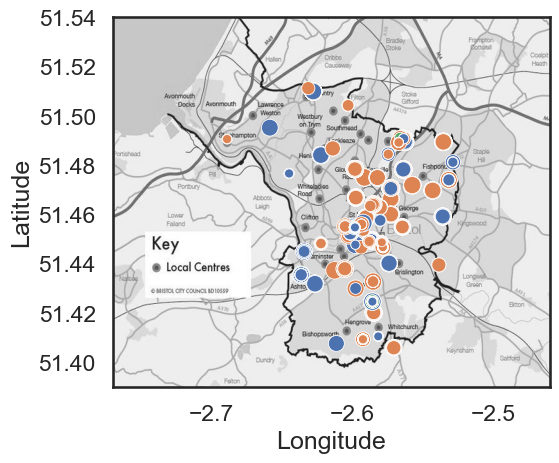

In [197]:
img = mpimg.imread("Images/bristol wards grey.jpeg")
fig = sns.scatterplot(data=df_wloc, x = "Longitude", y = "Latitude", hue = "Description 1", size = "Amount", 
                      legend=False )
fig.imshow(img,extent=[-2.77, -2.46, 51.39, 51.54], aspect = 1.75)


The dataframe above has data for individual projects spread over each payment, therefore some further grouping could be done. I created a new dataframe of the values I wanted. I wanted to get the total amounts spent on each project and the start and end date of the projects based on payments. This required grouping the entries and using a transform function to get my required values, I did this using two dataframes, one to work on and one to save the data. 

I grouped the entries by Description 2 and Description 1, and summed the amount spent. I did the same grouping for date and tool the min and max to find the start and end. 

In [198]:
df_new = pd.DataFrame()
df_new["Description 1"] = df_wloc["Description 1"]
df_new["Description 2"] = df_wloc["Description 2"]
df_new["Start date"] = pd.to_datetime(df_wloc["Pay Date"],dayfirst=True)
df_new["End date"] = pd.to_datetime(df_wloc["Pay Date"],dayfirst=True)
df_new["Amount"] = df_wloc["Amount"].replace(',','', regex=True).astype(float)
df_new["Latitude"] = df_wloc["Latitude"]
df_new["Longitude"] = df_wloc["Longitude"]

df_new2 = df_new
df_new2["Amount"] = df_new.groupby(["Description 2","Description 1"])["Amount"].transform(sum)
df_new = df_new.sort_values("End date")
df_new2["Start date"] =  df_new.groupby(["Description 2","Description 1"])["Start date"].transform(min)
df_new2["End date"] =  df_new.groupby(["Description 2","Description 1"])["End date"].transform(max)
df_new2 = df_new2.drop_duplicates()

df_new2

/var/folders/ml/s2r5g8_x31l75sq2ql0l0qww0000gn/T/ipykernel_75764/2125287339.py:11: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

/var/folders/ml/s2r5g8_x31l75sq2ql0l0qww0000gn/T/ipykernel_75764/2125287339.py:13: FutureWarning:

The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.

/var/folders/ml/s2r5g8_x31l75sq2ql0l0qww0000gn/T/ipykernel_75764/2125287339.py:14: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.



,Description 1,Description 2,Start date,End date,Amount,Latitude,Longitude
0,"Conversion, Renovation & Improvement",St Werburgh's Primary School Phase I II,2013-09-01,2013-10-01,13641.00,51.470623,-2.572763
1,"Conversion, Renovation & Improvement",BWP 100 Temple Street,2013-09-01,2014-04-01,615188.00,51.449556,-2.586631
2,New Construction,St Bonaventures Primary Phased rebuild,2013-09-01,2014-06-01,1085607.00,51.478468,-2.598276
3,New Construction,May Park Primary,2013-09-01,2014-01-01,8162.00,51.471975,-2.557598
4,New Construction,Glenfrome Primary Expansion to 2 FE,2013-09-01,2014-05-01,14257.00,51.478346,-2.563946
...,...,...,...,...,...,...,...
1606,New Construction,Capital - Filwood Broadway,2023-07-05,2023-09-25,9261.00,51.424683,-2.585881
1624,"Conversion, Renovation & Improvement",Bristol Museum & Art Gallery Investment Programme,2023-08-08,2023-09-19,35587.61,51.447764,-2.597976
1626,Acquisition of Buildings,Bottle Yard Studios  Home England,2023-08-08,2023-08-08,475000.00,51.410579,-2.581746
1648,"Conversion, Renovation & Improvement",Capital - Old Sneed Nature Reserve,2023-10-03,2023-10-03,2400.00,51.476701,-2.64505


Now I have a dataframe with the amounts in it I can see where the most money was spent over the years from 2013 to 2023. 

The top ten projects can be shown on a graph, however the project with the most money spent on it was the Bristol Beacon with £86M. This was drastically more than the others and that distored the graphs. So I've dropped it from the list to display the graph clearer. 

Following the Bristol Beacon then next biggest project was City Hall, where £16.8M was spent on it. 

Following this they spent £10.5M on 100 Temple Street.

,Description 1,Description 2,Start date,End date,Amount,Latitude,Longitude
771,"Conversion, Renovation & Improvement",Capital Chester Park Expansion,2016-07-18,2019-12-19,1673564.0,51.474089,-2.531613
397,New Construction,Capital Bridge Farm Primary School Phase 1 P...,2015-01-01,2016-09-12,2207796.0,51.405967,-2.570696
344,New Construction,Capital Compass Point Primary reception class...,2014-12-01,2016-11-24,2427543.0,51.43802,-2.605521
134,New Construction,Capital Colstons Primary Phase 2 Land purchas...,2014-07-01,2016-06-16,2583905.0,51.466918,-2.597631
364,New Construction,Capital Barton Hill Expansion,2014-12-01,2017-08-21,2872878.0,51.454976,-2.564595
1340,New Construction,Capital Pending Approvals GR05 Hawkfield Bu...,2021-04-28,2022-07-22,4233724.0,51.409396,-2.592601
767,New Construction,Capital Chester Park Expansion,2016-07-14,2019-06-10,5935773.0,51.474089,-2.531613
135,New Construction,Capital Filwood Green Business Park,2014-07-01,2016-10-27,8939909.0,51.420222,-2.58496
150,"Conversion, Renovation & Improvement",Capital BWP 100 Temple Street,2014-07-01,2018-07-26,10516813.0,51.449556,-2.586631
155,"Conversion, Renovation & Improvement",Capital BWP City Hall Refit,2014-07-01,2017-08-24,16800553.0,51.452537,-2.601679


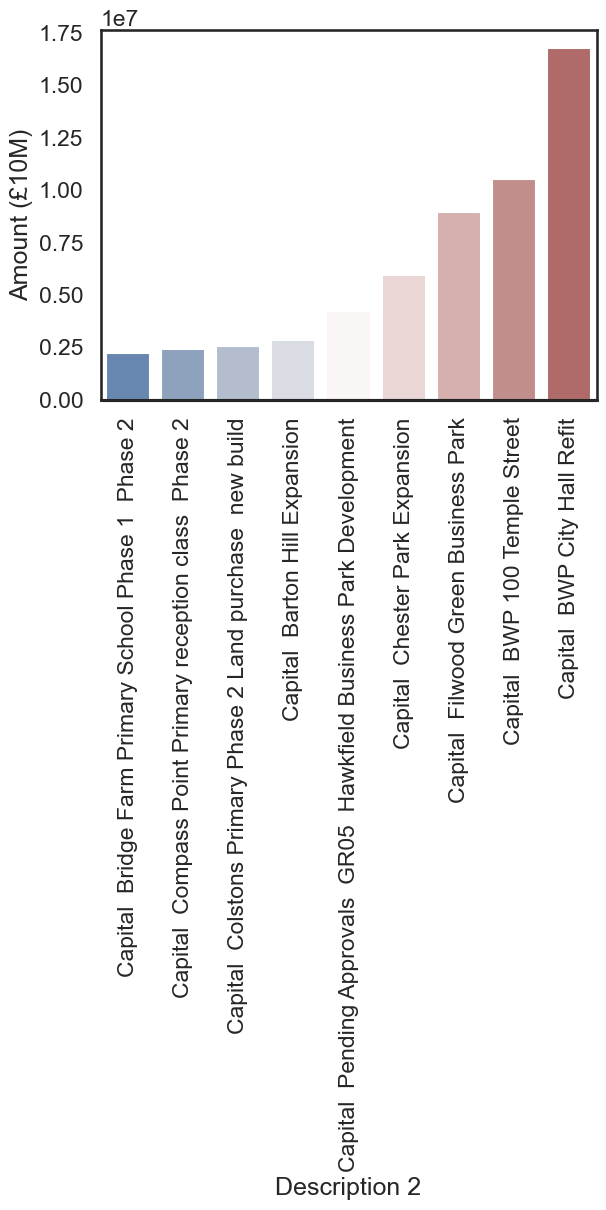

In [225]:
df_sort = df_new2.sort_values(["Amount"])

df_sort.drop(df_sort.tail(1).index,inplace = True)

sns.set_theme(style="white", context="talk")

# Center the data to make it diverging
x = df_sort.tail(9)["Description 2"]
y = df_sort.tail(9)["Amount"]
fig = sns.barplot(x=x, y=y, hue=x, palette="vlag")
fig.axhline(0, color="k", clip_on=False)
fig.set_ylabel("Amount (£10M)")
fig.tick_params(axis='x', rotation=90)

df_sort.tail(10)

### Mapping the project

To create a more accurate map of the projects, I found that Arc GIS was able to use the longitude and latitude in my dataframe to plot the points accurately. I could use the amounts and descriptions to group the data for a more accurate map plot.

I exported the information to a CSV file which can then be uploaded to Arc GIS.

In [226]:
#Export the data frame to a CSV file to import it into an ArcGIS map
df_new2.to_csv("Points.csv")

The Bristol wards were already saved as an Arc GIS mapping file, so I was able to add this to my map which defined my wards.

Using the Join Features tool in Arc GIS you can then link the wards to the dataframe, based on their location. Producing a dataframe which has the wards added to a dataframe with the spend.

This can be downloaded from Arc GIS as a CSV file and uploaded back into this workbook.

In [261]:
#Upload the linked dataframe
df_link = pd.read_csv("CSV/Spend and ward.csv")

#Remove columns we don't need
df_link = df_link.drop(axis=1,columns=["OBJECTID","Join_Count","TARGET_FID","No Of Councillors","WARD_ID","x","y"])

df_link["End date"] = pd.to_datetime(df_link["End date"])
df_link

/var/folders/ml/s2r5g8_x31l75sq2ql0l0qww0000gn/T/ipykernel_75764/3902045338.py:7: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Description 1,Description 2,Start date,End date,Amount,Latitude,Longitude,Name
0,"Conversion, Renovation & Improvement",St Werburgh's Primary School Phase I II,9/1/2013 12:00:00 AM,2013-10-01,13641.00,51.470623,-2.572763,Ashley
1,"Conversion, Renovation & Improvement",BWP 100 Temple Street,9/1/2013 12:00:00 AM,2014-04-01,615188.00,51.449556,-2.586631,Central
2,New Construction,St Bonaventures Primary Phased rebuild,9/1/2013 12:00:00 AM,2014-06-01,1085607.00,51.478468,-2.598276,Redland
3,New Construction,May Park Primary,9/1/2013 12:00:00 AM,2014-01-01,8162.00,51.471975,-2.557598,Eastville
4,New Construction,Glenfrome Primary Expansion to 2 FE,9/1/2013 12:00:00 AM,2014-05-01,14257.00,51.478346,-2.563946,Lockleaze
...,...,...,...,...,...,...,...,...
143,New Construction,Capital - Filwood Broadway,7/5/2023 12:00:00 AM,2023-09-25,9261.00,51.424683,-2.585881,Filwood
144,"Conversion, Renovation & Improvement",Bristol Museum & Art Gallery Investment Programme,8/8/2023 12:00:00 AM,2023-09-19,35587.61,51.447764,-2.597976,Central
145,Acquisition of Buildings,Bottle Yard Studios  Home England,8/8/2023 12:00:00 AM,2023-08-08,475000.00,51.410579,-2.581746,Hengrove & Whitchurch Park
146,"Conversion, Renovation & Improvement",Capital - Old Sneed Nature Reserve,10/3/2023 12:00:00 AM,2023-10-03,2400.00,51.476701,-2.645050,Stoke Bishop


### Trends in Wards

We now have the spend data by ward, and we now need to add to it the trend data to see how people are feeling after this work has been completed in their ward.

Therefore we need to import the quality of life CSV file. I've combined all the files from multiple years into one data set here.

In [229]:
#Import the councils Qualifty of Life CSV file which has all their property names in it:
df_QoL = pd.read_csv("CSV/Quality_of_life.csv")
df_QoL

,FID,Year,indicator_,indicator,theme,theme_indi,ward_code,ward_name,survey_que,sample_siz,statistic,standard_e,lower_conf,upper_conf
0,1.0,2018,IQOL17003,% who agree they can influence decisions that ...,Council & Democracy,Council & Democracy/% who agree they can influ...,,.Bristol Average,Q17003,3480,14.030311,0.679072,12.751390,15.414842
1,2.0,2018,IQOL17004,% who agree people from different backgrounds ...,Community & Living,Community & Living/% who agree people from dif...,,.Bristol Average,Q17004,3502,68.132152,0.910653,66.321299,69.889843
2,3.0,2018,IQOL17009,% who think noise from residential neighbours ...,Community & Living,Community & Living/% who think noise from resi...,,.Bristol Average,Q17009,3410,32.863641,0.938359,31.051395,34.728382
3,4.0,2018,IQOL17010,"% who think noise from pubs, clubs and enterta...",Community & Living,Community & Living/% who think noise from pubs...,,.Bristol Average,Q17010,3174,15.119458,0.720153,13.761426,16.585732
4,5.0,2018,IQOL17025,% whose poor health stops them from getting in...,Community & Living,Community & Living/% whose poor health stops t...,,.Bristol Average,Q17018,3500,9.372931,0.516252,8.408872,10.434925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44454,6524.0,2022,IQOL17074,% satisfied with the range and quality of outd...,Culture & Leisure,Culture & Leisure/% satisfied with the range a...,E05010910,St George Central,NaN,110,49.891466,4.850431,40.501382,59.289211
44455,6525.0,2022,IQOL17080,% who have access to the internet at home,Community & Living,Community & Living/% who have access to the in...,E05010910,St George Central,NaN,110,93.348839,2.408969,86.773560,96.776760
44456,6526.0,2022,IQOL17081,% who have access to the internet at home thro...,Community & Living,Community & Living/% who have access to the in...,E05010910,St George Central,NaN,110,89.757473,2.816568,82.779543,94.109083
44457,6527.0,2022,IQOL17102,% satisfied overall with their current accommo...,Housing,Housing/% satisfied overall with their current...,E05010910,St George Central,NaN,99,83.202377,4.265530,73.142016,90.009110


Drop the columns we don't need and for now we will use the question whether people are satisfied with their local area, as a assessment. 

The data needs a bit of cleaning too, as they changed "and" and "&" in the ward names at one point. 

In [230]:
#Drop the columns we don't need from the data frame:
df_LA = df_QoL.drop(columns = ["FID","indicator_","theme","theme_indi","ward_code","survey_que"])

#We will use the questions as the the % satisfied with their local area, so take these rows into a new dataframe:
df_LA = df_LA[df_LA["indicator"] == "% satisfied with their local area"]

#The ward names were changed between years by changing "and" and "&". Change them all to "&"
df_LA["ward_name"].replace({" and ":" & "},inplace = True,regex=True)

#Remove the Bristol average from the dataframe
df_LA = df_LA[df_LA["ward_name"] != ".Bristol Average"]

df_LA


/var/folders/ml/s2r5g8_x31l75sq2ql0l0qww0000gn/T/ipykernel_75764/4017742737.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Year,indicator,ward_name,sample_siz,statistic,standard_e,lower_conf,upper_conf
201,2018,% satisfied with their local area,Ashley,149,76.589260,3.980862,67.920066,83.485348
475,2018,% satisfied with their local area,Bishopsworth,72,64.295481,5.635549,52.673773,74.447731
1221,2018,% satisfied with their local area,Westbury-on-Trym & Henleaze,162,93.304943,2.474217,86.508633,96.804076
1373,2018,% satisfied with their local area,Easton,162,80.129774,3.127426,73.291010,85.562429
1417,2018,% satisfied with their local area,Filwood,96,54.528009,5.381364,43.935760,64.725742
...,...,...,...,...,...,...,...,...
43877,2022,% satisfied with their local area,Brislington West,118,78.991137,3.795509,70.601663,85.478902
43946,2022,% satisfied with their local area,Central,117,67.486466,5.101658,56.821272,76.602105
44003,2022,% satisfied with their local area,Horfield,123,67.875361,4.349454,58.833401,75.749912
44181,2022,% satisfied with their local area,Clifton Down,119,88.753547,3.935993,78.464372,94.473086


The percentage of people questioned regarding how satisfied they are with their ward can then be plotted to see how it varies over time.

In [231]:
df_LA = df_LA.sort_values(["Year"])

#Create a line chart showing how the total amount payed per month changes over time.
fig = px.line(df_LA,x="Year",y="statistic",color = "ward_name")
fig.show()
df_LA

,Year,indicator,ward_name,sample_siz,statistic,standard_e,lower_conf,upper_conf
26967,2017,% satisfied with their local area,Knowle,95,70.154202,5.146769,59.215133,79.190344
26829,2017,% satisfied with their local area,Southmead,55,60.249437,8.609632,42.831393,75.407626
32452,2017,% satisfied with their local area,Windmill Hill,124,92.150223,2.717410,84.898088,96.080565
32398,2017,% satisfied with their local area,Stoke Bishop,111,91.525587,2.996880,83.510627,95.838849
31733,2017,% satisfied with their local area,Ashley,174,80.325647,3.537845,72.472063,86.360334
...,...,...,...,...,...,...,...,...
40331,2022,% satisfied with their local area,Avonmouth & Lawrence Weston,134,68.145633,5.057954,57.536632,77.156429
40440,2022,% satisfied with their local area,Hartcliffe & Withywood,106,41.592561,5.246433,31.803641,52.092939
40594,2022,% satisfied with their local area,Clifton,117,97.825205,0.884821,95.216993,99.025692
39309,2022,% satisfied with their local area,St George Central,111,64.979530,4.948014,54.784418,73.968174


To get the change in trend per year we can create a new dataframe by gettting a list of the wards and the years. The years go as the column titles in a new dataframe and the wards as the start of each row.

We can then use a for loop to work through the wards and years to find the difference between a previous year and the next year to find the change in that year.

In [251]:
#Create a list of the wards
l_wards = df_LA["ward_name"].drop_duplicates().to_list()

#Create a list of the years
l_years = df_LA["Year"].drop_duplicates().to_list()

#Remove the last value
del l_years[0]

#Add it to ward so we can rename the columns in a dataframe with a list
cols = ["Ward"]
cols.extend(l_years)

#Create a new dataframe for the trend of those that are satisfied with their local area across the years.
df_trends = pd.DataFrame(columns=cols)
df_trends["Ward"] = l_wards

#Go through creating adding the trend to show how the opinion changed each year from the last for year ward.
for i in range(len(l_years)):
    year = l_years[i]
    year_down= year - 1
    trend = []
    for j in range(df_trend.shape[0]):
        ward = df_trend.iloc[j]["Ward"] 
        year_LA = df_LA["statistic"].loc[(df_LA['Year'] == year) & ((df_LA['ward_name'] == ward))].iloc[0]
        year_LA_down = df_LA["statistic"].loc[(df_LA['Year'] == year_down) & ((df_LA['ward_name'] == ward))].iloc[0]
        trend.append(year_LA- year_LA_down)
    df_trends[l_years[i]] = trend

df_trends

,Ward,2018,2019,2020,2021,2022
0,Knowle,14.334273,-6.264264,3.905525,0.770264,2.343186
1,Southmead,12.754198,-7.054969,7.995638,-13.244304,6.843503
2,Windmill Hill,-8.348462,5.161583,-1.612194,-1.751149,0.407334
3,Stoke Bishop,-2.992184,7.749443,-1.344465,-3.738380,3.449313
4,Ashley,-3.736386,4.509442,-1.596231,-8.202471,13.825743
5,Stockwood,-8.474825,9.321804,12.710958,-13.020883,-4.974127
6,Brislington East,2.202044,-2.322903,7.380521,-5.942416,1.546613
7,Easton,3.091751,0.638013,-1.095769,-5.472018,-4.037671
8,Brislington West,9.513058,-3.274165,0.075695,1.566216,-4.708863
9,Henbury & Brentry,9.725879,-6.095529,3.827177,-13.330355,13.540814


We can then add this trend data to the dataframe to see the feeling in each ward in the year after the project was finished. 

In [262]:
#Remove the years from the linked dataframe that we don't have years for in the survey data.
df_link = df_link[(df_link["End date"] >= "2017-01-01") & (df_link["End date"] <= "2022-01-01")]

#Create a list for the trend data
l_trend = []

#Use a for loop to find the ward name, end year of the project and look at the trend data for the next year.
for i in range(df_link.shape[0]):
    x = df_trends.iloc[df_trends.index[df_trends['Ward'] == df_link.iloc[i]['Name']]][int(str(int(df_link.iloc[i]['End date'].
                                                                                                  strftime("%Y"))+1))]
    x  = x.values[0]
    l_trend.append(x)

#Add this to the link dataframe
df_link["Trend"] = l_trend
df_link

/var/folders/ml/s2r5g8_x31l75sq2ql0l0qww0000gn/T/ipykernel_75764/4220864491.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Description 1,Description 2,Start date,End date,Amount,Latitude,Longitude,Name,Trend
37,New Construction,Capital Environmental Improvement Programme,7/1/2014 12:00:00 AM,2020-12-09,623403.0,51.469817,-2.543095,Eastville,-2.243892
42,"Conversion, Renovation & Improvement",Capital BWP 100 Temple Street,7/1/2014 12:00:00 AM,2018-07-26,10516813.0,51.449556,-2.586631,Central,0.331771
44,"Conversion, Renovation & Improvement",Capital BWP City Hall Refit,7/1/2014 12:00:00 AM,2017-08-24,16800553.0,51.452537,-2.601679,Hotwells & Harbourside,-0.013760
48,"Conversion, Renovation & Improvement",Capital Trenchard St Cp Structural,8/1/2014 12:00:00 AM,2017-04-03,97147.0,51.454968,-2.599595,Central,0.391439
51,"Conversion, Renovation & Improvement",Capital St Werburgh's Primary School Phase I II,9/1/2014 12:00:00 AM,2020-06-11,24023.0,51.470623,-2.572763,Ashley,-8.202471
62,New Construction,Capital Barton Hill Expansion,12/1/2014 12:00:00 AM,2017-08-21,2872878.0,51.454976,-2.564595,Lawrence Hill,-8.424573
65,New Construction,Capital Dev Of City Wide 20Mph Speed Limit,4/2/2015 12:00:00 AM,2020-03-12,473639.0,51.464148,-2.585162,Ashley,-8.202471
69,"Conversion, Renovation & Improvement",Capital Ashton Court Estate Refurbishment of...,7/30/2015 12:00:00 AM,2020-03-24,897530.0,51.445024,-2.634402,Bedminster,-14.860945
71,"Conversion, Renovation & Improvement",Capital Environmental Improvement Programme,11/6/2015 12:00:00 AM,2020-09-30,15874.0,51.469817,-2.543095,Eastville,-2.243892
72,New Construction,Capital Central Library,11/12/2015 12:00:00 AM,2017-02-02,13882.0,51.451434,-2.602845,Hotwells & Harbourside,-0.013760


A useful comparison might be the change in percentage points per £M spent, so this can be calculated and added to the table.

In [263]:
#Add a new column calculating the points per £M spent.
df_link["Points per £M"] = df_link["Trend"] / (df_link["Amount"]/1000000)
df_link

/var/folders/ml/s2r5g8_x31l75sq2ql0l0qww0000gn/T/ipykernel_75764/1458913328.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Description 1,Description 2,Start date,End date,Amount,Latitude,Longitude,Name,Trend,Points per £M
37,New Construction,Capital Environmental Improvement Programme,7/1/2014 12:00:00 AM,2020-12-09,623403.0,51.469817,-2.543095,Eastville,-2.243892,-3.599425
42,"Conversion, Renovation & Improvement",Capital BWP 100 Temple Street,7/1/2014 12:00:00 AM,2018-07-26,10516813.0,51.449556,-2.586631,Central,0.331771,0.031547
44,"Conversion, Renovation & Improvement",Capital BWP City Hall Refit,7/1/2014 12:00:00 AM,2017-08-24,16800553.0,51.452537,-2.601679,Hotwells & Harbourside,-0.013760,-0.000819
48,"Conversion, Renovation & Improvement",Capital Trenchard St Cp Structural,8/1/2014 12:00:00 AM,2017-04-03,97147.0,51.454968,-2.599595,Central,0.391439,4.029349
51,"Conversion, Renovation & Improvement",Capital St Werburgh's Primary School Phase I II,9/1/2014 12:00:00 AM,2020-06-11,24023.0,51.470623,-2.572763,Ashley,-8.202471,-341.442429
62,New Construction,Capital Barton Hill Expansion,12/1/2014 12:00:00 AM,2017-08-21,2872878.0,51.454976,-2.564595,Lawrence Hill,-8.424573,-2.932451
65,New Construction,Capital Dev Of City Wide 20Mph Speed Limit,4/2/2015 12:00:00 AM,2020-03-12,473639.0,51.464148,-2.585162,Ashley,-8.202471,-17.317982
69,"Conversion, Renovation & Improvement",Capital Ashton Court Estate Refurbishment of...,7/30/2015 12:00:00 AM,2020-03-24,897530.0,51.445024,-2.634402,Bedminster,-14.860945,-16.557602
71,"Conversion, Renovation & Improvement",Capital Environmental Improvement Programme,11/6/2015 12:00:00 AM,2020-09-30,15874.0,51.469817,-2.543095,Eastville,-2.243892,-141.356447
72,New Construction,Capital Central Library,11/12/2015 12:00:00 AM,2017-02-02,13882.0,51.451434,-2.602845,Hotwells & Harbourside,-0.013760,-0.991213


We can reduce the dataframe down by taking these comparison columns and grouping by Description 2 to combine projects.

In [304]:
#Group the projects by Description 2 and sort by the trend.
df_trend = df_link.groupby("Description 2",as_index=False)[["Trend","Points per £M"]].sum()
df_trend = df_trend.sort_values(["Trend"])
df_trend

,Description 2,Trend,Points per £M
18,Capital Glencoyne Square,-26.488608,-6462.126875
2,Capital Ashton Court Estate Refurbishment of...,-14.860945,-16.557602
13,Capital Dovercourt Depot,-13.046995,-205.538943
17,Capital Filwood Broadway Cinema Housing Delivery,-11.535010,-2629.961252
30,Capital WUB Replicate,-10.005214,-190.658625
5,Capital Barton Hill Expansion,-8.424573,-2.932451
21,Capital Parks NP City Wide,-8.202471,-316.136263
26,Capital St Werburgh's Primary School Phase I II,-8.202471,-341.442429
12,Capital Dev Of City Wide 20Mph Speed Limit,-8.202471,-17.317982
24,Capital Redcliffe Way,-7.367214,-3934.602511


We can then plot the top 5 and bottom 5 projects based on the trend.

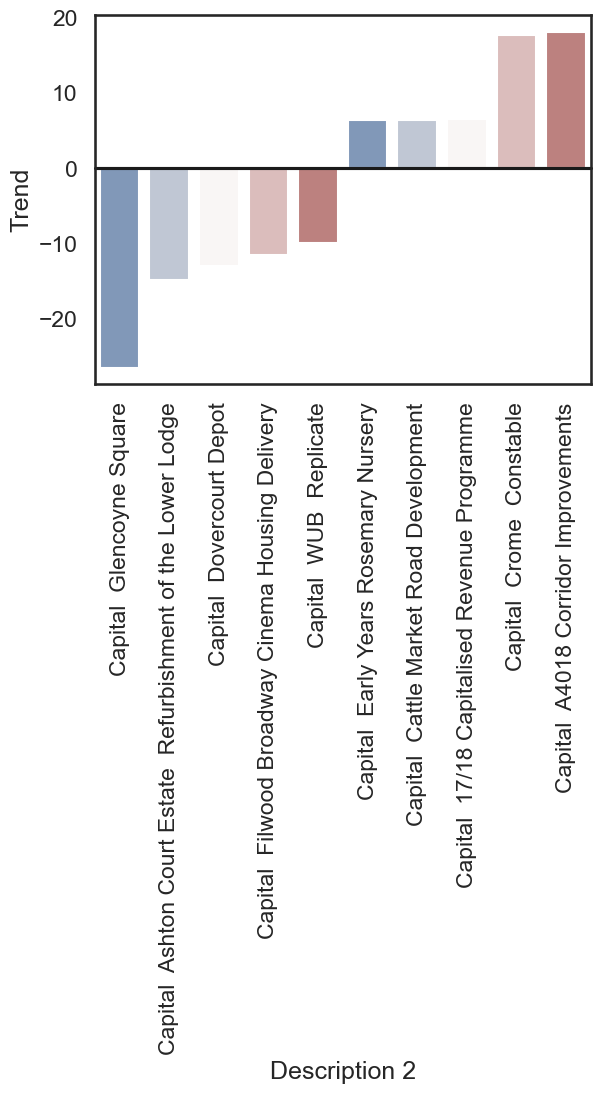

In [305]:
#Set the plot style
sns.set_theme(style="white", context="talk")

#Find the worst five trend values and plot them.
x = df_trend.head(5)["Description 2"]
y = df_trend.head(5)["Trend"]
fig = sns.barplot(x=x, y=y, hue=x, palette="vlag")

# Find the best five trend values and plot them.
x = df_trend.tail(5)["Description 2"]
y = df_trend.tail(5)["Trend"]
fig2 = sns.barplot(x=x, y=y, hue=x, palette="vlag")
fig2.axhline(0, color="k", clip_on=False)
fig2.set_ylabel("Trend")
fig2.tick_params(axis='x', rotation=90)



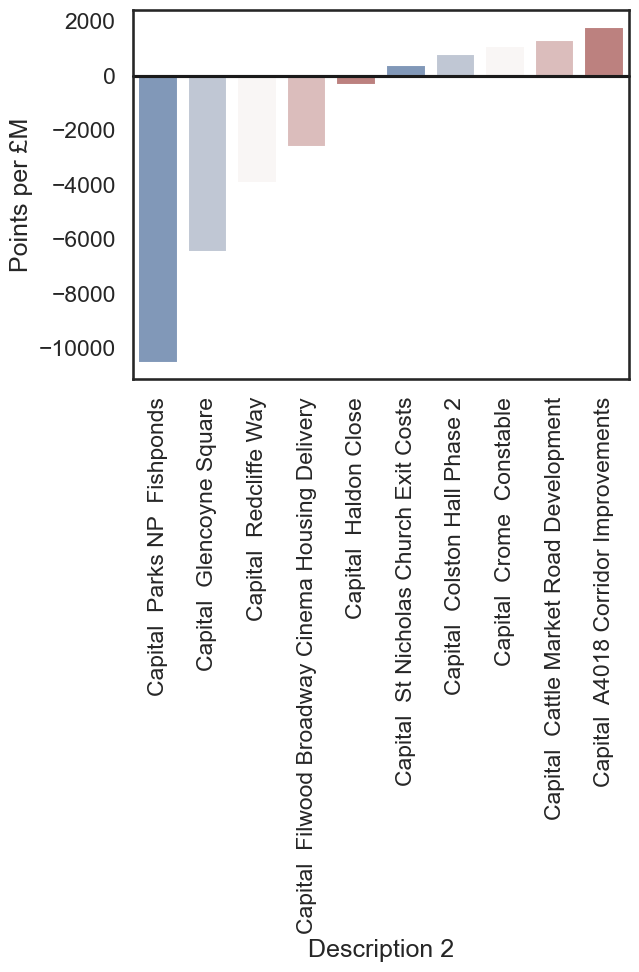

In [309]:
#Sort by points per £M
df_trend = df_trend.sort_values(["Points per £M"])

#Find the worst five points per values and plot them.
x = df_trend.head(5)["Description 2"]
y = df_trend.head(5)["Points per £M"]
fig = sns.barplot(x=x, y=y, hue=x, palette="vlag")

#Find the best five points per values and plot them.
x = df_trend.tail(5)["Description 2"]
y = df_trend.tail(5)["Points per £M"]
fig2 = sns.barplot(x=x, y=y, hue=x, palette="vlag")
fig2.axhline(0, color="k", clip_on=False)
fig2.set_ylabel("Points per £M")
fig2.tick_params(axis='x', rotation=90)


### Summary

We could start to draw conclusions from this data about what projects are worth spending moment on in terms of people perceptions following them. However this project was just to practice using python and other features. In reality people opinions on their wards will vary by more factors than just what was built there in the last year, therefore this data is not accurate. Looking through the descriptions and the locations data, you can see that some projects were not actually specific to a location, however my method of finding a location did give them one, so this would need to be improved too.

You could improve this by looking at more detail into the survey questions and then you could probably find more accurate survey questions relating to projects. For example there might be survey data on Education estabilishments, and therefore school projects could be compared to this.

To get more accurate location data, a thought is you might be able to use the data we have gathered to train a machine learning language programme to learn what locations are and then run that to find locations more accurately. 